In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import TensorFlow for building the neural network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Import scikit-learn utilities for evaluation
from sklearn.metrics import classification_report, confusion_matrix

# Load and Prepare the Data
try:
    train_df = pd.read_csv('data/fashion-mnist_train.csv')
    test_df = pd.read_csv('data/fashion-mnist_test.csv')
    print("Successfully loaded data from local CSV files.")
except FileNotFoundError:
    print("Error: CSV files not found.")
    exit()

# Data Preprocessing
y_train = train_df['label'].values
X_train = train_df.drop('label', axis=1).values

y_test = test_df['label'].values
X_test = test_df.drop('label', axis=1).values

# Classify Labels by making where in the list it is equal to the number.
Labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

# The images are 28x28 pixels so they need to be reshaped to fit that.
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)

# Since each pixel is just darkness between 1 to 255 it can be normalized to 0 to 1 instead
X_train = X_train / 255.0
X_test = X_test / 255.0

print("--- Data Shape ---")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)





Successfully loaded data from local CSV files.
--- Data Shape ---
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


Vizualize some of the images

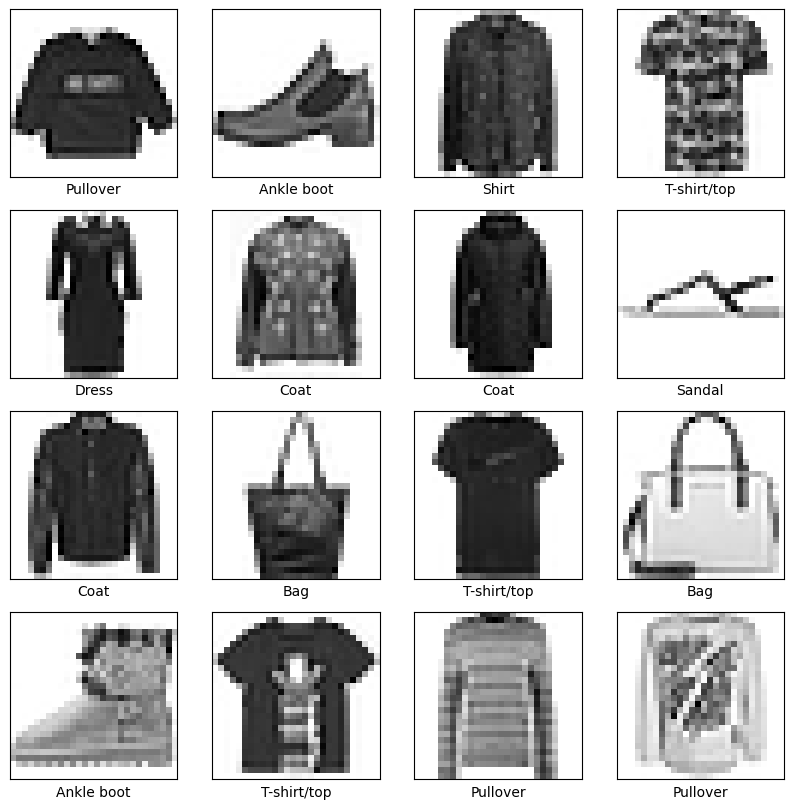

In [2]:
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(Labels[y_train[i]])
plt.show()

Build the Neural Network Model

Used this link to help (https://stackoverflow.com/questions/54282753/how-to-input-2d-numpy-array-into-tensorflow-also-on-how-to-get-matrix-input-an)

In [3]:
model = tf.keras.models.Sequential()
# Because the image is 28x28 the model needs to be set with that shape
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))

#Wasnt sure what to set the layers to so i got AI to help decide a good amount
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Because the amount of labels is equal to 10 it needs to be set to that
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\PC\Desktop\Skole\Semester 5\-IE500618-Assignment-3-\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Since there are 10 classes the train and test needs to be encoded with the target label
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

print("y_train_categorical shape:", y_train_categorical.shape)

y_train_categorical shape: (60000, 10)


Train the Model while making sure 20% of the data can be used for validation

In [ ]:
# I tried multiple diffrent ones however it seemed that after 20 epochs the val_loss would become too high for small increases 
# so i decided to limit the training to a bit less than 20 and reduced the batch size by a lot as well
print("--- Starting Model Training ---")
history = model.fit(X_train, y_train_categorical,
                    epochs=15,
                    batch_size=32,
                    validation_split=0.2) 
print("--- Model Training Complete ---")

--- Starting Model Training ---
Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8138 - loss: 0.5186 - val_accuracy: 0.8238 - val_loss: 0.4846
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8575 - loss: 0.3883 - val_accuracy: 0.8661 - val_loss: 0.3779
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8720 - loss: 0.3544 - val_accuracy: 0.8658 - val_loss: 0.3812
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8778 - loss: 0.3358 - val_accuracy: 0.8679 - val_loss: 0.3854
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8827 - loss: 0.3242 - val_accuracy: 0.8673 - val_loss: 0.3784
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8886 - loss: 0.3127 - val_accuracy: 0.8702 - val_loss: 0.3785
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8902 - loss: 0.3074 - val_accuracy: 0.8795 - val_loss: 0.3711
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - ac

Since the model has been trained we can now check how well the training went.

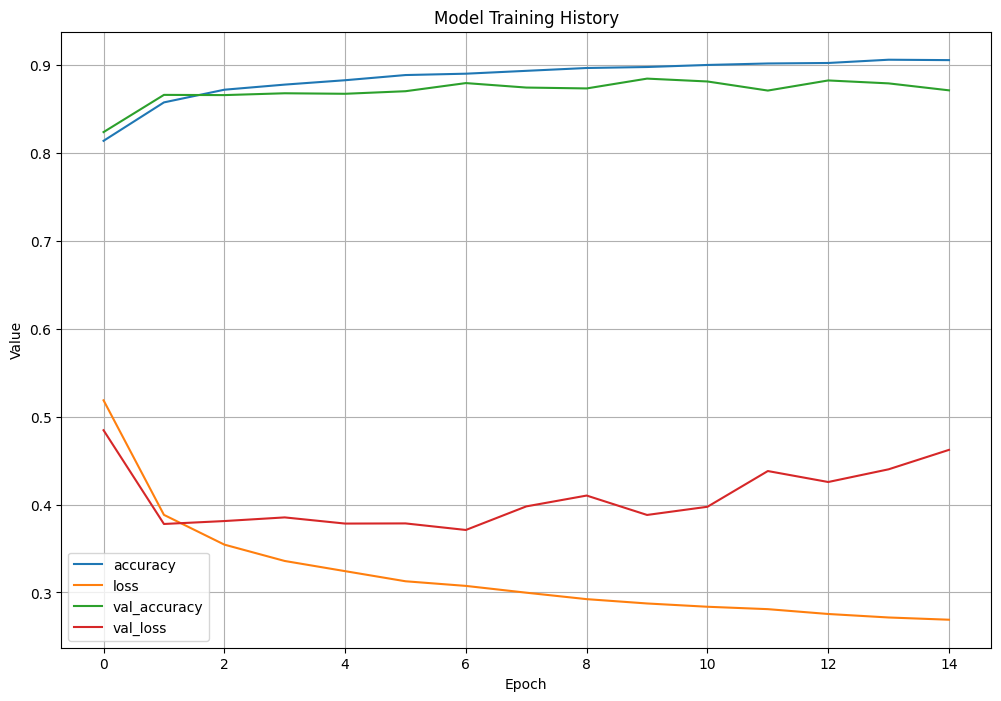

In [6]:
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.gca()
plt.show()

Based on how it stopped increasing after around 15 epochs we can now evaluate the model on our test data.

In [7]:
print("--- Evaluating Model on Test Data ---")
test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=1)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

--- Evaluating Model on Test Data ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 733us/step - accuracy: 0.8700 - loss: 0.4479

Test Loss: 0.4479
Test Accuracy: 0.8700 (87.00%)


We can see that the model is very accurate however we dont know which labels it confuses for others the most so we can then use a confusion matrix to vizualise and see what causes the most issues.

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 601us/step


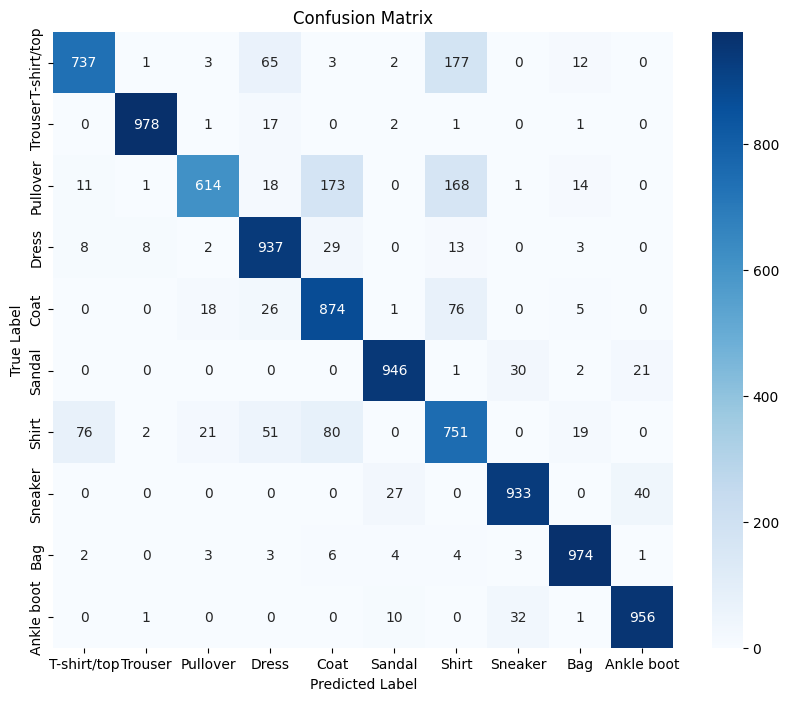

In [ ]:
# Make predictions on the test set
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1) 

# Calculate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# This Plot was made with help from AI
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=Labels, yticklabels=Labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [9]:
print("--- Classification Report ---\n")
print(classification_report(y_test, y_pred, target_names=Labels))

--- Classification Report ---

              precision    recall  f1-score   support

 T-shirt/top       0.88      0.74      0.80      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.93      0.61      0.74      1000
       Dress       0.84      0.94      0.89      1000
        Coat       0.75      0.87      0.81      1000
      Sandal       0.95      0.95      0.95      1000
       Shirt       0.63      0.75      0.69      1000
     Sneaker       0.93      0.93      0.93      1000
         Bag       0.94      0.97      0.96      1000
  Ankle boot       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000



As seen from the Classification Report and the confusion matrix this model is very accurate for things that are quite unique. However T-shirts can easily be confused for Shirts.